<a href="https://colab.research.google.com/github/jurreyyahfirdaws-mohammad/INFO7375-Neural-Networks-AI/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = 10

# Model creation with 5 layers
model = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(input_shape,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# outputy
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 311 (1.21 KB)
Trainable params: 311 (1.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


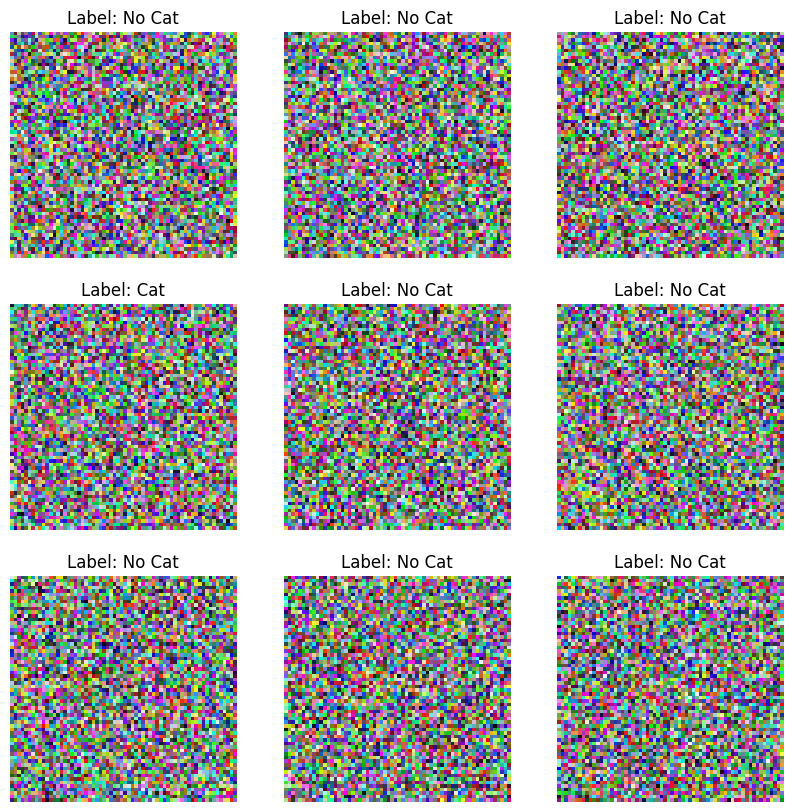

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for image dataset
num_samples = 500  # Number of images
image_height = 64  # Height of the image
image_width = 64  # Width of the image
channels = 3

# Generate images
X_train = np.random.randint(0, 255, (num_samples, image_height, image_width, channels), dtype=np.uint8)

# Generate labels (1 for cat, 0 for no cat)
y_train = np.random.randint(0, 2, (num_samples,))


def plot_images(images, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        if i < len(images):

            ax.imshow(images[i])

            ax.set_title(f"Label: {'Cat' if labels[i] == 1 else 'No Cat'}")
            ax.axis('off')
    plt.show()

# Display images and their labels
plot_images(X_train[:9], y_train[:9], 3, 3)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)        

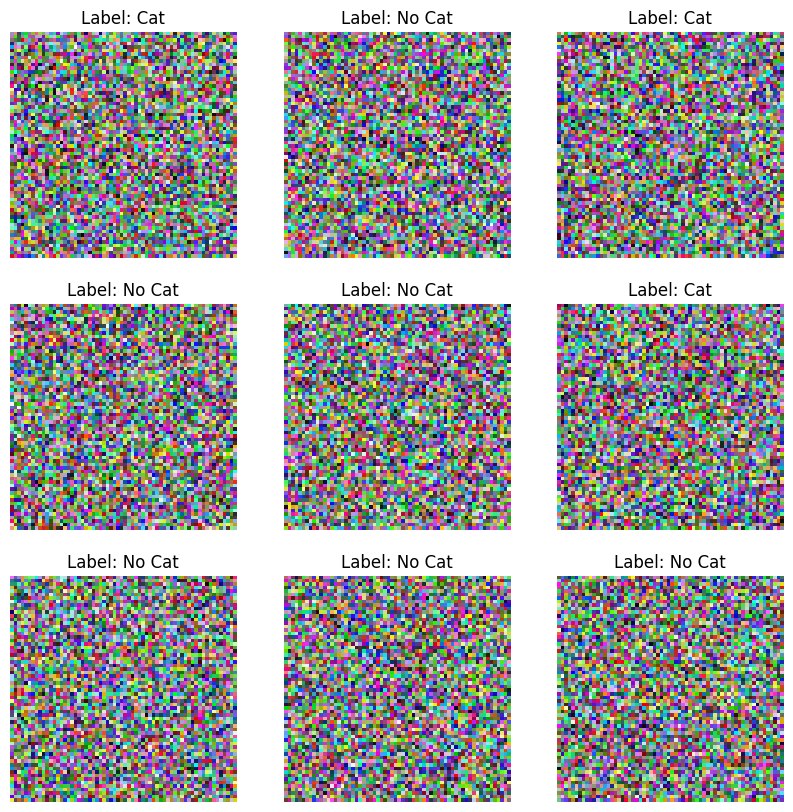

Epoch 1/10
16/16 [==============================] - 7s 314ms/step - loss: 0.7248 - accuracy: 0.4980
Epoch 2/10
16/16 [==============================] - 4s 253ms/step - loss: 0.7019 - accuracy: 0.5340
Epoch 3/10
16/16 [==============================] - 3s 182ms/step - loss: 0.6919 - accuracy: 0.5340
Epoch 4/10
16/16 [==============================] - 4s 238ms/step - loss: 0.6933 - accuracy: 0.5340
Epoch 5/10
16/16 [==============================] - 3s 194ms/step - loss: 0.6922 - accuracy: 0.5340
Epoch 6/10
16/16 [==============================] - 3s 180ms/step - loss: 0.6935 - accuracy: 0.5340
Epoch 7/10
16/16 [==============================] - 3s 179ms/step - loss: 0.6915 - accuracy: 0.5340
Epoch 8/10
16/16 [==============================] - 3s 214ms/step - loss: 0.6937 - accuracy: 0.5340
Epoch 9/10
16/16 [==============================] - 4s 213ms/step - loss: 0.6912 - accuracy: 0.5340
Epoch 10/10
16/16 [==============================] - 3s 179ms/step - loss: 0.6906 - accuracy: 0.5340

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# dimensions and channels
image_height = 64
image_width = 64
channels = 3

# convolutional neural network model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model
model.summary()

# random image data
num_samples = 500
X_train = np.random.randint(0, 255, (num_samples, image_height, image_width, channels), dtype=np.uint8)
y_train = np.random.randint(0, 2, (num_samples,))

# Normalizing
X_train = X_train / 255.0

# plot images
def plot_images(images, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i])
            ax.set_title(f"Label: {'Cat' if labels[i] == 1 else 'No Cat'}")
            ax.axis('off')
    plt.show()

# Display images and their labels
plot_images(X_train[:9], y_train[:9], 3, 3)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)
